# ***Import the Libraries***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ***Step 1: `Load the data`***

In [2]:
url = "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"

In [3]:
data = pd.read_csv(url)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

#### **Check how many `rows` and `columns` in the data**
- **`No of Rows`    :  891**
- **`No of Columns` :  12**

# ***Step2: `Data Description` :***
- ***A story of what data is all about and the features present in the data***

### **`Data Description:`**
- **Survived :** 
   - `0` : Passenger not servived  
   - `1` : Passenger servived
- **pclass :** Ticket Class 
   - `1` : 1st class(upper) 
   - `2` : 2nd class(middle)
   - `3` : 3rd class(lower)
- **sibsp :** of siblings / spouses aboad the Titanic
- **parch :** of parents / children aboard the Titanic
- **ticket :** Ticket number
- **Fare :** Passenger fare
- **cabin :** cabin number
- **embarked :** Port of Embarkation 
   - `C` : Cherbourg
   - `Q` : Queenstown
   - `S` : Southampton 

# ***Step3: `Performing both Statistical and Graphical Data Analysis`***

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

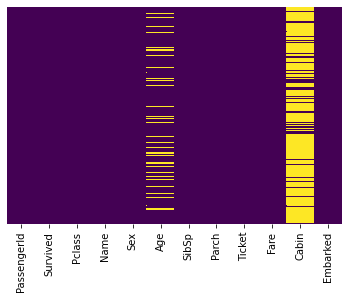

In [7]:
sns.heatmap(data.isnull(), yticklabels = False, cbar=False, cmap='viridis')
plt.show()

- Roughly 20% of the Age data is missing. 
- The proportion of `Age` missing is likely small enough for resonable replacement with some form of imputation, 
- Looking at the `Cabin` column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like 'Cabin Known : 1 or 0'

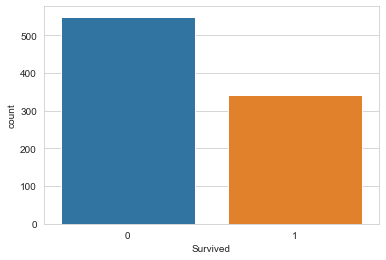

In [8]:
sns.set_style('whitegrid')
sns.countplot(x = data.Survived)
plt.show()

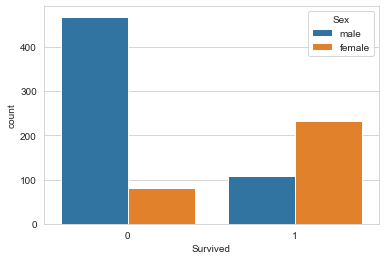

In [9]:
sns.countplot(x = 'Survived', hue = 'Sex' , data=data)
plt.show()

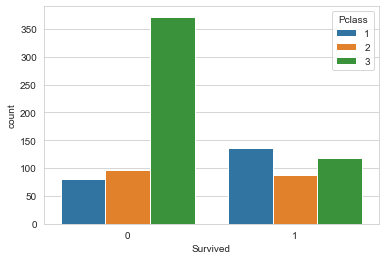

In [10]:
sns.countplot(x = 'Survived', hue = 'Pclass' , data=data)
plt.show()

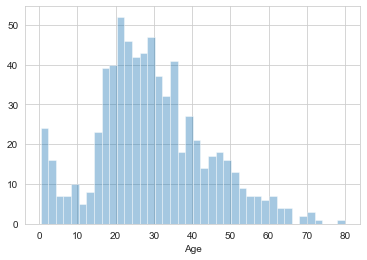

In [11]:
sns.distplot(data['Age'].dropna(), kde=False, bins = 40)
plt.show()

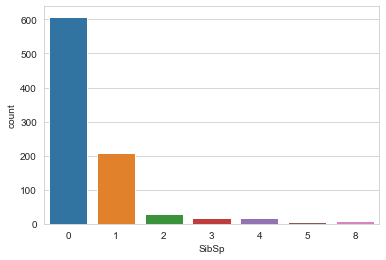

In [12]:
sns.countplot(data['SibSp'])
plt.show()

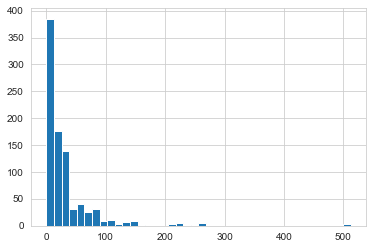

In [13]:
data['Fare'].hist(bins = 40)
plt.show()

In [14]:
pd.crosstab([data.Pclass, data.Sex], data.Survived)

Survived         0   1
Pclass Sex            
1      female    3  91
       male     77  45
2      female    6  70
       male     91  17
3      female   72  72
       male    300  47

- **Let's check the relationships of variables with target data**

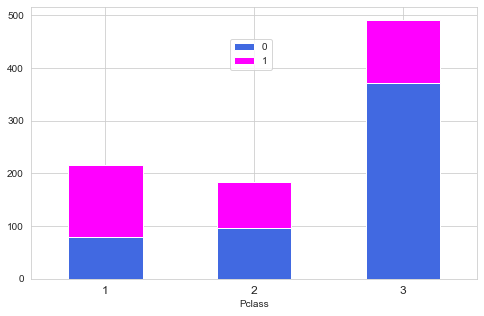

In [15]:
pd.crosstab(data.Pclass, data.Survived,).plot.bar(stacked=True,figsize=(8,5),color=['#4169E1','#FF00FF'])
plt.xticks(rotation=0,size='large')
plt.legend(bbox_to_anchor=(0.55,0.9))
plt.show()

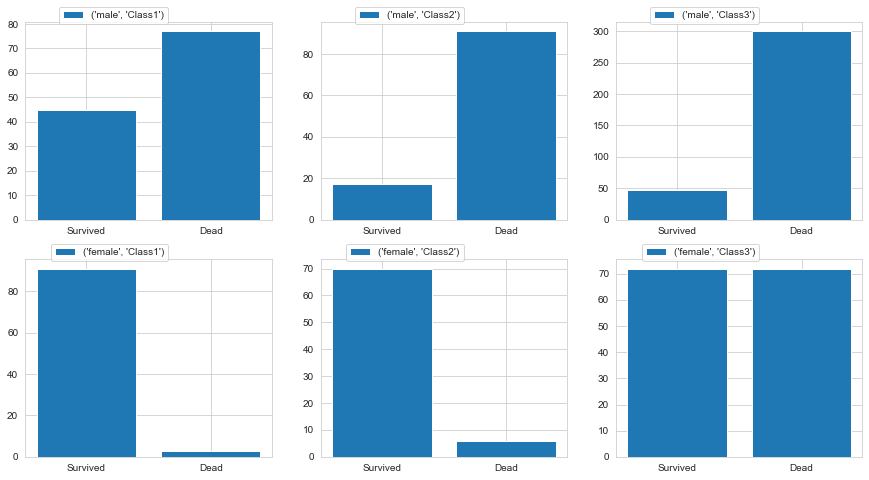

In [16]:
fig,axes=plt.subplots(2,3,figsize=(15,8))
Sex1 = ['male','female']
for i,ax in zip(Sex1,axes):
    for j,pp in zip(range(1,4),ax):
        PclassSex = data[(data.Sex==i)&(data.Pclass==j)]['Survived'].value_counts().sort_index(ascending=False)
        pp.bar(range(len(PclassSex)),PclassSex,label=(i,'Class'+str(j)))
        pp.set_xticks((0,1))
        pp.set_xticklabels(('Survived','Dead'))
        pp.legend(bbox_to_anchor=(0.6,1.1))

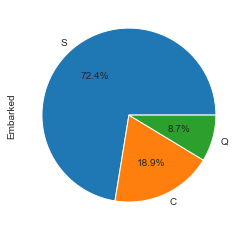

In [17]:
data.Embarked.value_counts().plot.pie(autopct = '%1.1f%%')
plt.show()

#### **Data Cleaning**
- We want to fill misssing age data instead of just dropping the missing age data rows. 
- One way to do this is by filling in the mean age of all the passengers (Imputation). 
   - However we can be smarter about this and check the `average age by passenger class`.

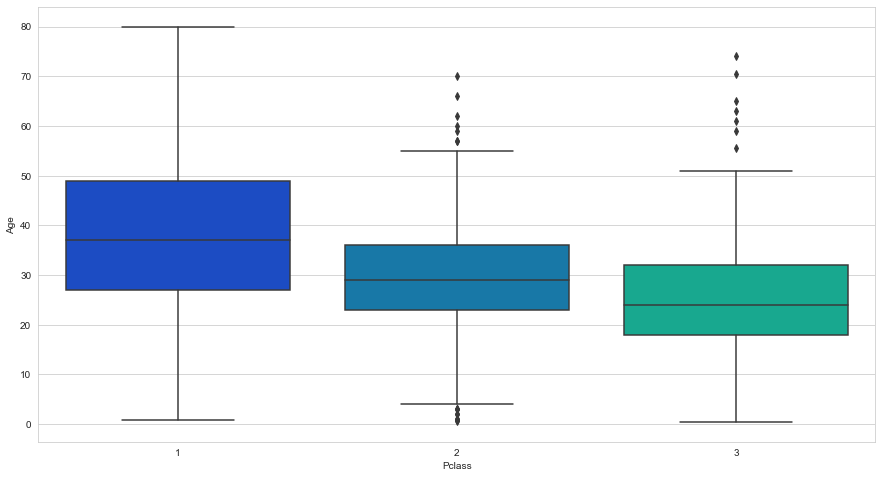

In [18]:
plt.figure(figsize=(15,8))
sns.boxplot(x = 'Pclass', y = 'Age', data=data, palette='winter')
plt.show()

- we can see the weather passengers in the higher classes tend to be older, which makes sense, 
  - we'll use these average age values to impute based on `Pclass` for `Age`.
- Average values of `Pclass`:
  - `Pclass == 1`: **Avg. = 37**
  - `Pclass == 2`: **Avg. = 29**
  - `Pclass == 3`: **Avg. = 24**


In [4]:
def impute_age(col):
    Age = col[0]
    Pclass = col[1]
    
    if pd.isnull(Age):
        if Pclass == 1:   
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

- if pclass == 1 so null space in `Age` column will fill with value **37** 
  - because 37 is the average value of pclass == 1 as we can see in boxplot
- if pclass == 2 so null space in `Age` column will fill with value **29** 
  - because 29 is the average value of pclass == 2 as we can see in boxplot 
- if pclass == 3 so null space in `Age` column will fill with value **24** 
  - because 24 is the average value of pclass == 3 as we can see in boxplot

In [5]:
data['Age'] = data[['Age','Pclass']].apply(impute_age, axis = 1)

- now let's check that heat map again

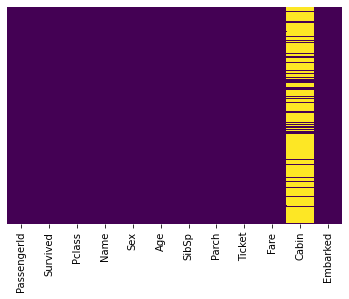

In [6]:
sns.heatmap(data.isnull(), yticklabels = False, cbar=False, cmap='viridis')
plt.show()

- great! let's go ahead and grop the cabin column and the row in `Embarked` that is **NaN**

In [7]:
data.drop('Cabin', axis=1, inplace=True)

In [8]:
data.dropna(axis = 0, inplace=True)

In [9]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

- **No missing value present in datase**

In [25]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.019314,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,13.209814,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [27]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,0.033008,-0.057686,-0.001657,0.012703
Survived,-0.005028,1.000000,-0.335549,-0.052051,-0.034040,0.083151,0.255290
Pclass,-0.035330,-0.335549,1.000000,-0.405549,0.081656,0.016824,-0.548193
Age,0.033008,-0.052051,-0.405549,1.000000,-0.242807,-0.170089,0.120938
SibSp,-0.057686,-0.034040,0.081656,-0.242807,1.000000,0.414542,0.160887
Parch,-0.001657,0.083151,0.016824,-0.170089,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,-0.548193,0.120938,0.160887,0.217532,1.000000


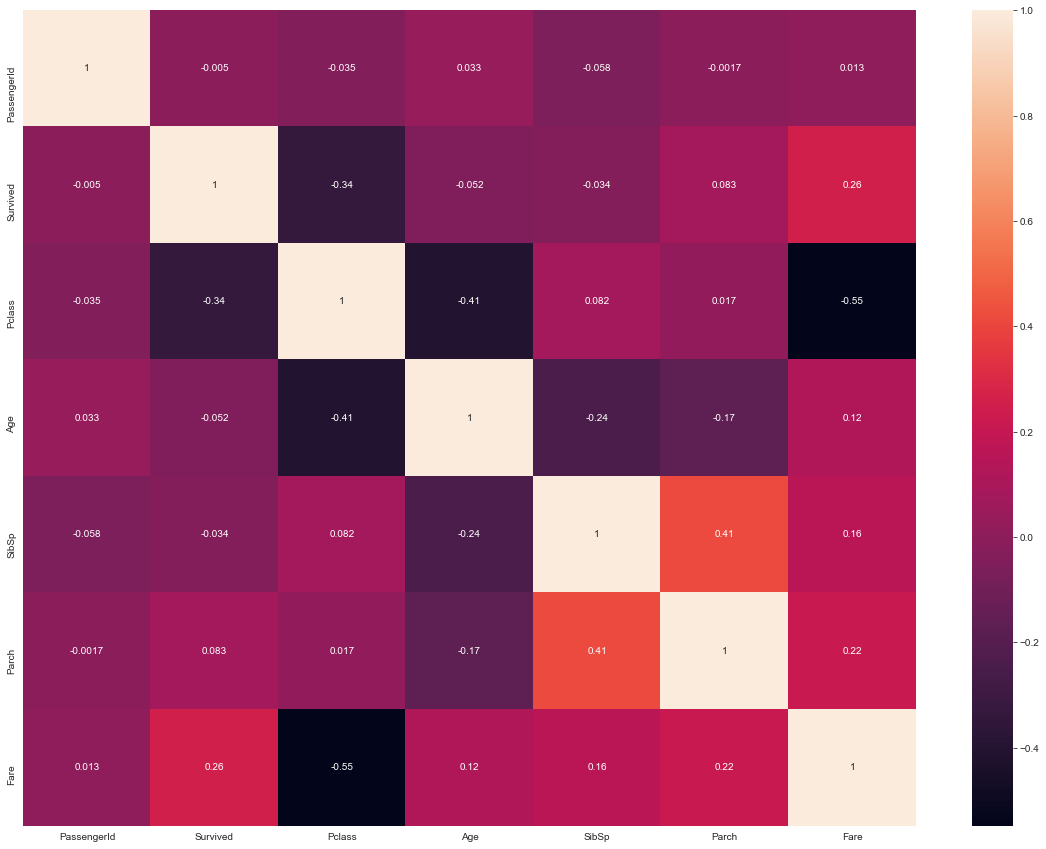

In [28]:
plt.figure(figsize = (20, 15))
sns.heatmap(data.corr(), annot = True)
plt.show()

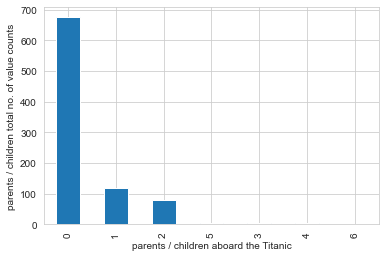

In [29]:
data.Parch.value_counts().plot.bar()
plt.xlabel('parents / children aboard the Titanic')
plt.ylabel('parents / children total no. of value counts')
plt.show()

In [30]:
gender = pd.crosstab(data.Sex,data.Survived)
gender.rename(index={0:'Female',1:'Male'},columns={0.0:'Dead',1.0:'Survived'},inplace=True)
gender

Survived,Dead,Survived
Sex,,
female,81,231
male,468,109


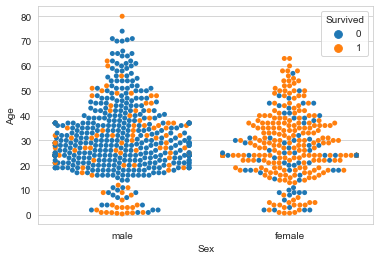

In [31]:
sns.swarmplot('Sex','Age',data= data, hue='Survived')
plt.show()

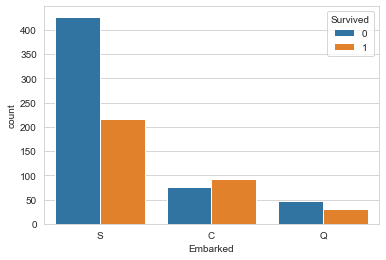

In [32]:
sns.countplot('Embarked',data = data, hue='Survived')
plt.show()

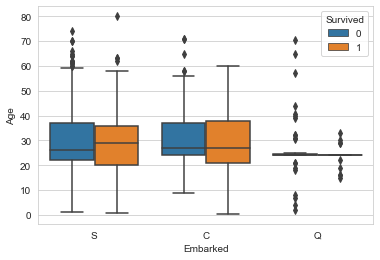

In [33]:
sns.boxplot('Embarked','Age',data = data, hue='Survived')
plt.show()

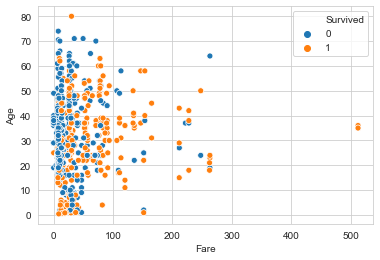

In [34]:
sns.scatterplot(y = data.Age, x = data.Fare, hue = data.Survived )
plt.show()

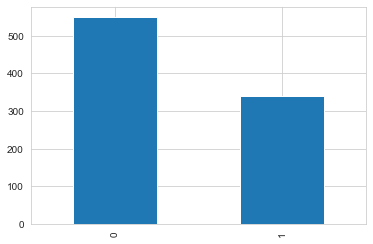

In [35]:
data.Survived.value_counts().plot.bar()
plt.show()

In [36]:
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

- Remove un-necessary columns

In [10]:
data.drop(columns=['PassengerId','Name','Ticket'],axis = 1, inplace=True)

In [11]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# ***Step 4: `Data Transformation and derivation of new attributes if necessary`***

- Lets Handle categorical data
- Creating Dummies for categorical features

In [12]:
dum_data = pd.get_dummies(data, drop_first = True)

In [13]:
pclass = pd.get_dummies(data['Pclass'], drop_first = True)

In [14]:
pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [15]:
pclass.rename(columns = {2:'Pclass_2',3:'Pclass_3'}, inplace = True)

In [16]:
pclass.head()

,Pclass_2,Pclass_3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [17]:
dum_data = pd.concat([dum_data, pclass], axis = 1)

In [18]:
dum_data.drop(columns = ['Pclass'], inplace = True)

In [19]:
dum_data.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


# ***Step 5: `Data Standardization and Normalization`***

In [20]:
scale_list = ['Age','Fare','SibSp','Parch']

In [21]:
scale_data = dum_data.copy()

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
def min_max_scale(col, scale_data):
    sc = MinMaxScaler()
    scale_data[col] = sc.fit_transform(scale_data[[col]])
    return scale_data

In [25]:
for col in scale_list:
    scale_data = min_max_scale(col, scale_data)

In [26]:
scale_data.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,0.271174,0.125,0.0,0.014151,1,0,1,0,1
1,1,0.472229,0.125,0.0,0.139136,0,0,0,0,0
2,1,0.321438,0.000,0.0,0.015469,0,0,1,0,1
3,1,0.434531,0.125,0.0,0.103644,0,0,1,0,0
4,0,0.434531,0.000,0.0,0.015713,1,0,1,0,1


# ***Step 6: `Creating of Train and Test data sets using optimum parameters`***

In [27]:
from sklearn.model_selection import train_test_split

In [29]:
y = scale_data['Survived']
X = scale_data.drop(columns = ['Survived'])

In [30]:
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [31]:
x_train.shape, x_test.shape

((711, 9), (178, 9))

# ***Step 7: `Model Training using ML Algorithm tested above`***

## **Step 7.a : `Model 1`**
## **Logistic Regression**

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
logit = LogisticRegression()

logit.fit(x_train,y_train)

LogisticRegression()

In [34]:
y_pred_test = logit.predict(x_test)
y_pred_train = logit.predict(x_train)

## **Step 7.a.1 : `Calculation of  Model Accuracy `**
- **Both Training and test Accuracies**
   - **`Logistic Regression`** 

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

In [36]:
print("Train Accuracy : ",round(accuracy_score(y_train, y_pred_train), 5))
print("Test Accuracy  : ",round(accuracy_score(y_test, y_pred_test), 6))

Train Accuracy :  0.80591
Test Accuracy  :  0.780899


**As we can see test and train accuracy is near to close but model is `Over-fitted`**
- Good performance on the training data, poor generliazation to other data.

### **CV (Cross Validation) for `Logistic Reg.`**
- `Cross-validation` sometimes called **rotation estimation** or **out-of-sample testing**, is any of various similar model validation techniques for assessing how the results of a statistical analysis will generalize to an independent data set.
- The goal of cross-validation is to test the model's ability to predict new data that was not used in estimating it, **in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset** (i.e., an unknown dataset, for instance from a real problem).


In [37]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logit, X, y, scoring='accuracy', cv=10)
scores

array([0.78651685, 0.79775281, 0.76404494, 0.84269663, 0.78651685,
       0.78651685, 0.7752809 , 0.78651685, 0.84269663, 0.79545455])

- **Cross-validation is a powerful preventative measure against `Overfitting`.**

- **Final Accuracy for Logistic Reg. Model**

In [38]:
print("Final CV Accuracy: " ,scores.mean())

Final CV Accuracy:  0.7963993871297242


## **Step 7.a.2 : `Saving the created Logistic Reg. Model File`**

In [72]:
# import pickle
# # Writing different model files to file
# with open( 'logitmodelForPrediction.sav', 'wb') as f:
#     pickle.dump(logit,f)

## **Step 7.b : `Model 2`**
## **Decision Tree Classifier**
- **without Hyper-parameter**

**decision trees in general don't usually require scaling.**
- so we use `dum_data` for this model

In [59]:
dum_data.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [39]:
y_1 = dum_data['Survived']
X_1 = dum_data.drop(columns = ['Survived'])

**Split data into train and test**

In [40]:
x1_train, x1_test, y1_train, y1_test = train_test_split(X_1, y_1, test_size = 0.2, random_state = 42)

In [41]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x1_train,y1_train)

DecisionTreeClassifier()

In [42]:
y_pred_test_dt = dtc.predict(x1_test)
y_pred_train_dt = dtc.predict(x1_train)

## **Step 7.b.1 : `Calculation of  Model Accuracy `**
- **Both Training and test Accuracies**
   - **`Decision Tree without Hyper-parameter`** 

In [43]:
print("Test Accuracy  : ",round(accuracy_score(y_test, y_pred_test_dt), 6))
print("Train Accuracy : ",round(accuracy_score(y_train, y_pred_train_dt), 5))

Test Accuracy  :  0.775281
Train Accuracy :  0.98594


In [102]:
# from sklearn import tree
# plt.figure(figsize=(15,10))
# tree.plot_tree(dtc,filled=True)

**As we can see test accuracy is less then train accuracy  it's mean model is `Over-fitted`**
- Good performance on the training data, poor generliazation to other data.

## **Step 7.b.2 : `Post pruning decision trees with cost complexity pruning`**

- `DecisionTreeClassifier` provides parameters such as **min_samples_leaf** and **max_depth** to prevent a tree from overfiting. 
- Cost complexity pruning provides another option to control the size of a tree. 
- `DecisionTreeClassifier`, this pruning technique is parameterized by the cost complexity parameter, ccp_alpha. 
  - Greater values of `ccp_alpha` increase the number of nodes pruned. 
 

In [44]:
path = dtc.cost_complexity_pruning_path(x1_train, y1_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [106]:
#ccp_alphas

In [45]:
clfs = []
for ccp_alpha in ccp_alphas:
    dtc_new = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
    dtc_new.fit(x1_train, y1_train)
    clfs.append(dtc_new)
    
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.13389773414629952


- For the remainder of this example, 
  - we remove the last element in `clfs` and `ccp_alphas`, 
    - because it is the trivial tree with only one node. 
    - Here we show that the number of nodes and tree depth decreases as alpha increases.

#### Accuracy vs alpha for training and testing sets

In [46]:
train_score = [dtc_new.score(x1_train, y1_train) for clf in clfs]
test_score = [dtc_new.score(x1_test, y1_test) for clf in clfs]

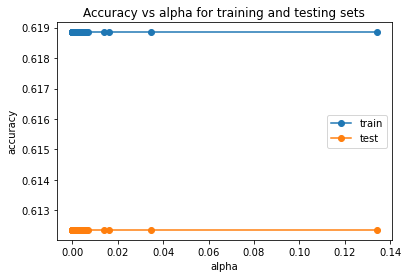

In [47]:
fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_score, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_score, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

- as we can see there is no relation 
- let's consider, 
  - `alpha = 0.01`

In [48]:
dtc1 = DecisionTreeClassifier(random_state=0, ccp_alpha=0.01)
dtc1.fit(x1_train, y1_train)

DecisionTreeClassifier(ccp_alpha=0.01, random_state=0)

## **Step 7.b.3 : `Calculation of  Model Accuracy `**
- **Both Training and test Accuracies**
   - **`Decision Tree for Post pruning decision tree`** 

In [49]:
y_pred_test_dtc1 = dtc1.predict(x1_test)
y_pred_train_dtc1 = dtc1.predict(x1_train)

In [50]:
print("Test Accuracy  : ",round(accuracy_score(y_test, y_pred_test_dtc1), 5))
print("Train Accuracy : ",round(accuracy_score(y_train, y_pred_train_dtc1), 5))

Test Accuracy  :  0.82022
Train Accuracy :  0.82278


**As we can see test accuracy is close to train accuracy it's mean model neither `Over-fitted` or `Unserfitting`**

#### ***Confusion Matrix***


In [51]:
conf_mat = confusion_matrix(y1_test, y_pred_test_dtc1)
conf_mat

array([[92, 17],
       [15, 54]], dtype=int64)

In [52]:
TP = conf_mat[0][0]
FP = conf_mat[0][1]
FN = conf_mat[1][0]
TN = conf_mat[1][1]

- **Breaking down the formula for** 
  - Accuracy 
  - Precision
  - Recall

In [53]:
Accuracy = (TP + TN) / (TP + FP + FN + TN)
Precision = TP/(TP + FP)
Recall = TP/(TP + FN)

print("Recall     : ",round(Recall, 4))
print("Precision  : ",round(Precision, 4))
print("Accuracy   : ",round(Accuracy, 4))

Recall     :  0.8598
Precision  :  0.844
Accuracy   :  0.8202


#### **F1 Score**

In [54]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8518518518518519

#### **Area Under Curve**

In [56]:
auc = roc_auc_score(y1_test, y_pred_test_dtc1)
auc

0.8133226964499403

In [57]:
# ROC
fpr, tpr, thresholds = roc_curve(y1_test, y_pred_test_dtc1)

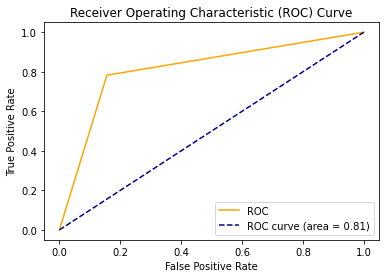

In [58]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## **Step 7.c : `Model 3`**
## **`Hyper-parameter tuning to achieve a better accuracy`**
## **Decision Tree Classifier**
- **with Hyper-parameter**

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,35,1),
    'min_samples_leaf' : range(1,15,1),
    'min_samples_split': range(2,15,1),
    'splitter' : ['best', 'random']
    
}

In [62]:
grid_search = GridSearchCV(estimator = dtc,
                     param_grid = grid_param,
                     cv = 5,
                    n_jobs = 1)

In [63]:
grid_search.fit(x1_train,y1_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 35),
                         'min_samples_leaf': range(1, 15),
                         'min_samples_split': range(2, 15),
                         'splitter': ['best', 'random']})

- **we get best parameters for Decision Tree model**

In [80]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 8, 'splitter': 'best'}


In [81]:
grid_search.best_score_

0.8396434551364129


### **Let's fit the model using best hyper-parameters**

In [96]:
dtc2 = DecisionTreeClassifier(criterion = 'gini', max_depth= 8, min_samples_leaf= 5, min_samples_split= 8, splitter= 'best')
dtc2.fit(x1_train,y1_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=5, min_samples_split=8)

In [97]:
y_pred_test_dt2 = dtc2.predict(x1_test)
y_pred_train_dt2 = dtc2.predict(x1_train)

## **Step 7.c.1 : `Calculation of  Model Accuracy `**
- **Both Training and test Accuracies**
   - **`Decision Tree with Hyper-parameter`** 

In [99]:
print("Train Accuracy : ",round(accuracy_score(y1_train, y_pred_train_dt2), 5))
print("Test Accuracy  : ",round(accuracy_score(y1_test, y_pred_test_dt2), 6))

Train Accuracy :  0.88045
Test Accuracy  :  0.775281


**As we can see test and train accuracy is not same it's mean model is `Over-fitted`**

#### **CV (Cross Validation) for `Decision Tree`**
- `Cross-validation` sometimes called **rotation estimation** or **out-of-sample testing**, is any of various similar model validation techniques for assessing how the results of a statistical analysis will generalize to an independent data set.
- The goal of cross-validation is to test the model's ability to predict new data that was not used in estimating it, **in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset** (i.e., an unknown dataset, for instance from a real problem).

In [92]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dtc2, X_1, y_1, scoring='accuracy', cv=10)
scores

array([0.74157303, 0.7752809 , 0.71910112, 0.83146067, 0.84269663,
       0.79775281, 0.84269663, 0.7752809 , 0.82022472, 0.82954545])

- **Cross-validation is a powerful preventative measure against `Overfitting`.**

- **Final Accuracy for Decision Tree Model**

In [93]:
print("Final CV Accuracy: " ,scores.mean())

Final CV Accuracy:  0.7975612870275791


## **Step 7.b.4 : `Saving the created Decision Tree Model File`**

In [94]:
# import pickle
# # Writing different model files to file
# with open('modelForPredictiondt.sav', 'wb') as f:
#     pickle.dump(dtc2,f)